In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns


import os
import random

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import cv2

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications import VGG19
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers
from tensorflow.keras.regularizers import l1, l2

In [ ]:
data_path = '/content/drive/MyDrive/Shuffeled_BT_Dataset'

In [ ]:
def main(train_data_path):

    """
    return training and testing dataframes including 2 columns image path and its label

    Args:
      train_data_path (string): string includes your train data path
      test_data_path (string): string includes your test data path
      note: data_path argument must contains your classes dirs

    Returns:
      train_df (dataframe):  It consists of two columns (the path of the image and its label) and contains records of the path of the training images and the label of each image
      test_df (dataframe):  It consists of two columns (the path of the image and its label) and contains records of the path of the testing images and the label of each image

    """

    for dirs in [train_data_path]:

        filepaths = []
        labels = []
        classes_list = sorted(os.listdir(dirs))

        filepaths,labels = get_fileList(classes_list, dirs, filepaths, labels)

        train_df = obtain_train_df(filepaths, labels)


    return train_df



def get_fileList(classes_list, dirs, filepaths, labels):


    """
    return file paths list including all full image paths and label for each one

    Args:
      classes_list (list): list includes name of classes dirs
      dirs (string): the data path
      filepaths (list): empty list to fill with images paths later
      labels (list): empty list to fill with each image label later

    Returns:
      count (scalar):  number of images in your dataset
    """


    for s_class in classes_list:

        label = s_class
        classpath = os.path.join(dirs, s_class)
        flist = sorted(os.listdir(classpath))

        store_image_names_and_its_labels(flist, classpath, filepaths, labels, label)

    return filepaths, labels


def store_image_names_and_its_labels(flist, classpath, filepaths, labels, label):

    """
    return nothing, it fills the filepaths list with all the images paths and its labels

    Args:
      flist (list) : contains all the image names in certain class
      classes_list (list): list includes name of classes dirs
      filepaths (list): stores all the images paths
      labels (list): stores the label of each image in the dataset
      label (string): label for a specific image

    Returns:
      nothing
    """


    for file in flist:
        file_path = os.path.join(classpath, file)
        filepaths.append(file_path)
        labels.append(label)



def obtain_train_df(filepaths, labels):

    """
    Return Dataframe with 2 columns contains each image path with its label

    Args:
      filepaths (list): stores all the images paths
      labels (list): stores the label of each image in the dataset

    Returns:
      train_df (DataFrame):  Dataframe with 2 columns contains each image path with its label
    """

    train_df =pd.DataFrame({
        'image_path' : filepaths,
        'label' : labels
    })
    return train_df

In [ ]:
data_df = main(data_path)
data_df.head()

,image_path,label
0,/content/drive/MyDrive/Shuffeled_BT_Dataset/As...,Astrocitoma T1
1,/content/drive/MyDrive/Shuffeled_BT_Dataset/As...,Astrocitoma T1
2,/content/drive/MyDrive/Shuffeled_BT_Dataset/As...,Astrocitoma T1
3,/content/drive/MyDrive/Shuffeled_BT_Dataset/As...,Astrocitoma T1
4,/content/drive/MyDrive/Shuffeled_BT_Dataset/As...,Astrocitoma T1


In [ ]:
num_classes = len(data_df['label'].unique())
print(f"We have {num_classes} classes")
print(f"We have {data_df.shape[0]} images")

We have 44 classes
We have 4497 images


In [ ]:
data_df['label'].value_counts()

Meningioma T1C+           375
_NORMAL T2                277
Meningioma T1             272
_NORMAL T1                251
Astrocitoma T1C+          233
Meningioma T2             233
Neurocitoma T1C+          223
Schwannoma T1C+           194
Astrocitoma T1            176
Astrocitoma T2            171
Schwannoma T1             148
Neurocitoma T1            130
Schwannoma T2             129
Carcinoma T1C+            112
Papiloma T1C+             108
Neurocitoma T2            104
Glioblastoma T1C+          94
Oligodendroglioma T1       86
Tuberculoma T1C+           84
Carcinoma T2               73
Oligodendroglioma T1C+     72
Meduloblastoma T1C+        67
Papiloma T1                66
Oligodendroglioma T2       66
Carcinoma T1               66
Papiloma T2                63
Ependimoma T2              57
Glioblastoma T2            55
Glioblastoma T1            55
Ependimoma T1C+            48
Ependimoma T1              45
Meduloblastoma T2          41
Germinoma T1C+             40
Tuberculom

In [ ]:
test_split_size = 0.3
train_df, test_df = train_test_split(data_df, test_size=test_split_size, shuffle=True, random_state=123, stratify=data_df['label'])
test_df, valid_df = train_test_split(test_df, test_size=0.5, shuffle=True, random_state=123, stratify=test_df['label'])

In [ ]:
train_df.head()

,image_path,label
3972,/content/drive/MyDrive/Shuffeled_BT_Dataset/_N...,_NORMAL T1
3334,/content/drive/MyDrive/Shuffeled_BT_Dataset/Pa...,Papiloma T2
2885,/content/drive/MyDrive/Shuffeled_BT_Dataset/Ne...,Neurocitoma T2
1687,/content/drive/MyDrive/Shuffeled_BT_Dataset/Me...,Meningioma T1
1381,/content/drive/MyDrive/Shuffeled_BT_Dataset/Gr...,Granuloma T1C+


In [ ]:
test_df.head()

,image_path,label
2323,/content/drive/MyDrive/Shuffeled_BT_Dataset/Me...,Meningioma T2
288,/content/drive/MyDrive/Shuffeled_BT_Dataset/As...,Astrocitoma T1C+
3229,/content/drive/MyDrive/Shuffeled_BT_Dataset/Pa...,Papiloma T1C+
1496,/content/drive/MyDrive/Shuffeled_BT_Dataset/Me...,Meduloblastoma T1C+
3327,/content/drive/MyDrive/Shuffeled_BT_Dataset/Pa...,Papiloma T2


In [ ]:
valid_df.head()

,image_path,label
2730,/content/drive/MyDrive/Shuffeled_BT_Dataset/Ne...,Neurocitoma T1C+
300,/content/drive/MyDrive/Shuffeled_BT_Dataset/As...,Astrocitoma T1C+
553,/content/drive/MyDrive/Shuffeled_BT_Dataset/As...,Astrocitoma T2
4000,/content/drive/MyDrive/Shuffeled_BT_Dataset/_N...,_NORMAL T1
892,/content/drive/MyDrive/Shuffeled_BT_Dataset/Ep...,Ependimoma T1C+


In [ ]:
print(f"We have {len(train_df)} images in the training dataset")
print(f"We have {len(valid_df)} images in the validating dataset")
print(f"We have {len(test_df)} images in the testing dataset")

We have 3147 images in the training dataset
We have 675 images in the validating dataset
We have 675 images in the testing dataset


In [ ]:
len(data_df)

NameError: ignored

In [ ]:
img_size = (224, 224)
channels = 3
color = 'rgb'
img_shape = (img_size[0], img_size[1], channels)
batch_size = 32
ts_length = len(test_df)
test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length%n == 0 and ts_length/n <= 80]))
test_steps = ts_length // test_batch_size
def scalar(img):
    return img

In [ ]:
tr_gen = ImageDataGenerator(preprocessing_function= scalar,
                            horizontal_flip= True)

ts_gen = ImageDataGenerator(preprocessing_function= scalar)

train_gen = tr_gen.flow_from_dataframe( train_df,
                                       x_col= 'image_path',
                                       y_col= 'label',
                                       target_size= img_size,
                                       class_mode= 'categorical',
                                       color_mode= color,
                                       shuffle= True,
                                       batch_size= batch_size)

valid_gen = ts_gen.flow_from_dataframe( valid_df,
                                       x_col= 'image_path',
                                       y_col= 'label',
                                       target_size= img_size,
                                       class_mode= 'categorical',
                                       color_mode= color,
                                       shuffle= True,
                                       batch_size= batch_size)

test_gen = ts_gen.flow_from_dataframe( test_df,
                                      x_col= 'image_path',
                                      y_col= 'label',
                                      target_size= img_size,
                                      class_mode= 'categorical',
                                      color_mode= color,
                                      shuffle= False,
                                      batch_size= test_batch_size)


Found 3146 validated image filenames belonging to 44 classes.
Found 675 validated image filenames belonging to 44 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1137: UserWarning: Found 1 invalid image filename(s) in x_col="image_path". These filename(s) will be ignored.
  warnings.warn(


Found 675 validated image filenames belonging to 44 classes.


In [ ]:
class_count = len(list(train_gen.class_indices.keys()))

In [ ]:
vgg16_model = tf.keras.applications.vgg19.VGG19(include_top=False, pooling='max', weights='imagenet', input_shape = img_shape)
for layer in vgg16_model.layers:
    layer.trainable = False

# Build the complete model
vgg16_base_model = Sequential([
    vgg16_model,
    BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001),
    Dense(256,
          kernel_regularizer=l2(l=0.016),
          activity_regularizer=l1(0.006),
          bias_regularizer=l1(0.006),
          activation='relu'),
    Dropout(rate=0.45, seed=123),
    Dense(class_count, activation='softmax')
])


vgg16_base_model.compile(Adamax(learning_rate= 0.001), loss= 'categorical_crossentropy', metrics= ['accuracy'])

vgg16_base_model.summary()

80134624/80134624 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 512)               20024384  
                                                                 
 batch_normalization (Batch  (None, 512)               2048      
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 256)               131328    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 44)                11308     
                                                                 
Total params: 20169068 (76.94 MB)
Trainable params: 14366

In [ ]:
#info about optimizers
vgg16_base_model.optimizer.get_config()

{'name': 'Adamax',
 'weight_decay': None,
 'clipnorm': None,
 'global_clipnorm': None,
 'clipvalue': None,
 'use_ema': False,
 'ema_momentum': 0.99,
 'ema_overwrite_frequency': None,
 'jit_compile': True,
 'is_legacy_optimizer': False,
 'learning_rate': 0.001,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'epsilon': 1e-07}

In [ ]:
early_stop = EarlyStopping(monitor='val_loss',
                           patience=5,
                           verbose=1)

checkpoint = ModelCheckpoint('model_weights_vgg16_2.h5',
                             monitor='val_loss',
                             save_best_only=True,
                             save_weights_only=True,
                             mode='min',
                             verbose=1)


history = vgg16_base_model.fit(x= train_gen,
                    steps_per_epoch = 98,
                    epochs= 100,
                    callbacks=[early_stop, checkpoint],
                    validation_data= valid_gen)

Epoch 1/100
20/20 [==============================] - ETA: 0s - loss: 10.1455 - accuracy: 0.0625 
Epoch 1: val_loss improved from inf to 13.69158, saving model to model_weights_vgg16.h5
20/20 [==============================] - 458s 23s/step - loss: 10.1455 - accuracy: 0.0625 - val_loss: 13.6916 - val_accuracy: 0.1230
Epoch 2/100
20/20 [==============================] - ETA: 0s - loss: 9.2590 - accuracy: 0.1516
Epoch 2: val_loss improved from 13.69158 to 11.29282, saving model to model_weights_vgg16.h5
20/20 [==============================] - 174s 9s/step - loss: 9.2590 - accuracy: 0.1516 - val_loss: 11.2928 - val_accuracy: 0.1348
Epoch 3/100
20/20 [==============================] - ETA: 0s - loss: 8.5561 - accuracy: 0.2406
Epoch 3: val_loss improved from 11.29282 to 9.89874, saving model to model_weights_vgg16.h5
20/20 [==============================] - 154s 8s/step - loss: 8.5561 - accuracy: 0.2406 - val_loss: 9.8987 - val_accuracy: 0.1630
Epoch 4/100
20/20 [===========================

In [ ]:
def plot_training(hist):
    '''
    This function take training model and plot history of accuracy and losses with the best epoch in both of them.
    '''

    tr_acc = hist.history['accuracy']
    tr_loss = hist.history['loss']
    val_acc = hist.history['val_accuracy']
    val_loss = hist.history['val_loss']
    index_loss = np.argmin(val_loss)
    val_lowest = val_loss[index_loss]
    index_acc = np.argmax(val_acc)
    acc_highest = val_acc[index_acc]
    Epochs = [i+1 for i in range(len(tr_acc))]
    loss_label = f'best epoch= {str(index_loss + 1)}'
    acc_label = f'best epoch= {str(index_acc + 1)}'

    plt.figure(figsize= (20, 8))
    plt.style.use('fivethirtyeight')

    plt.subplot(1, 2, 1)
    plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
    plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
    plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
    plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
    plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout
    plt.show()

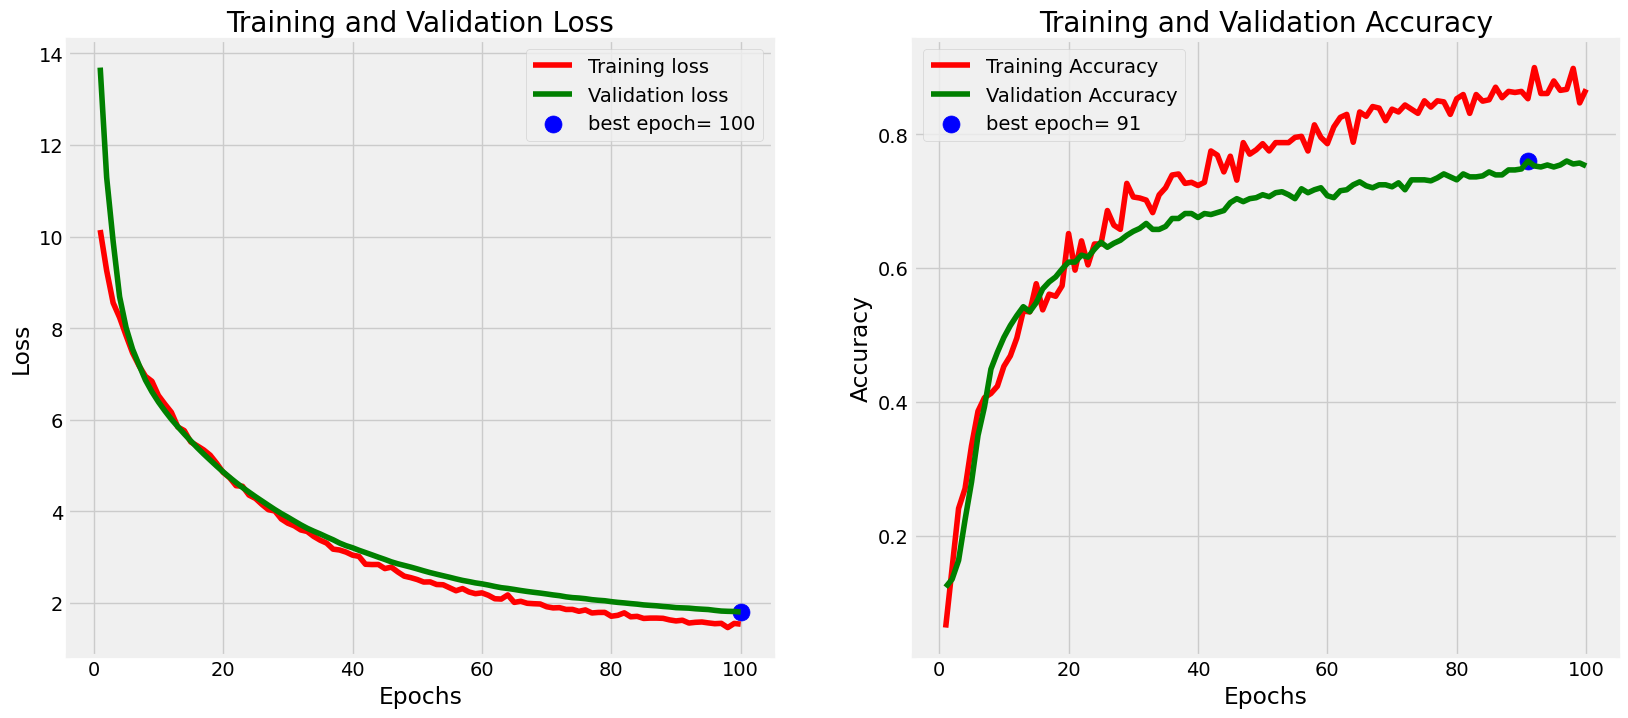

In [ ]:
plot_training(history)

In [ ]:
ts_length = len(test_df)
test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length%n == 0 and ts_length/n <= 80]))
test_steps = ts_length // test_batch_size

train_score = vgg16_base_model.evaluate(train_gen, steps= test_steps, verbose= 1)
valid_score = vgg16_base_model.evaluate(valid_gen, steps= test_steps, verbose= 1)
test_score = vgg16_base_model.evaluate(test_gen, steps= test_steps, verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

9/9 [==============================] - 210s 25s/step - loss: 1.7679 - accuracy: 0.7778
Train Loss:  1.291292428970337
Train Accuracy:  0.9444444179534912
--------------------
Validation Loss:  1.7965302467346191
Validation Accuracy:  0.7569444179534912
--------------------
Test Loss:  1.7679005861282349
Test Accuracy:  0.7777777910232544


In [ ]:
y_pred = vgg16_base_model.predict(test_gen)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = test_gen.classes

9/9 [==============================] - 6s 581ms/step


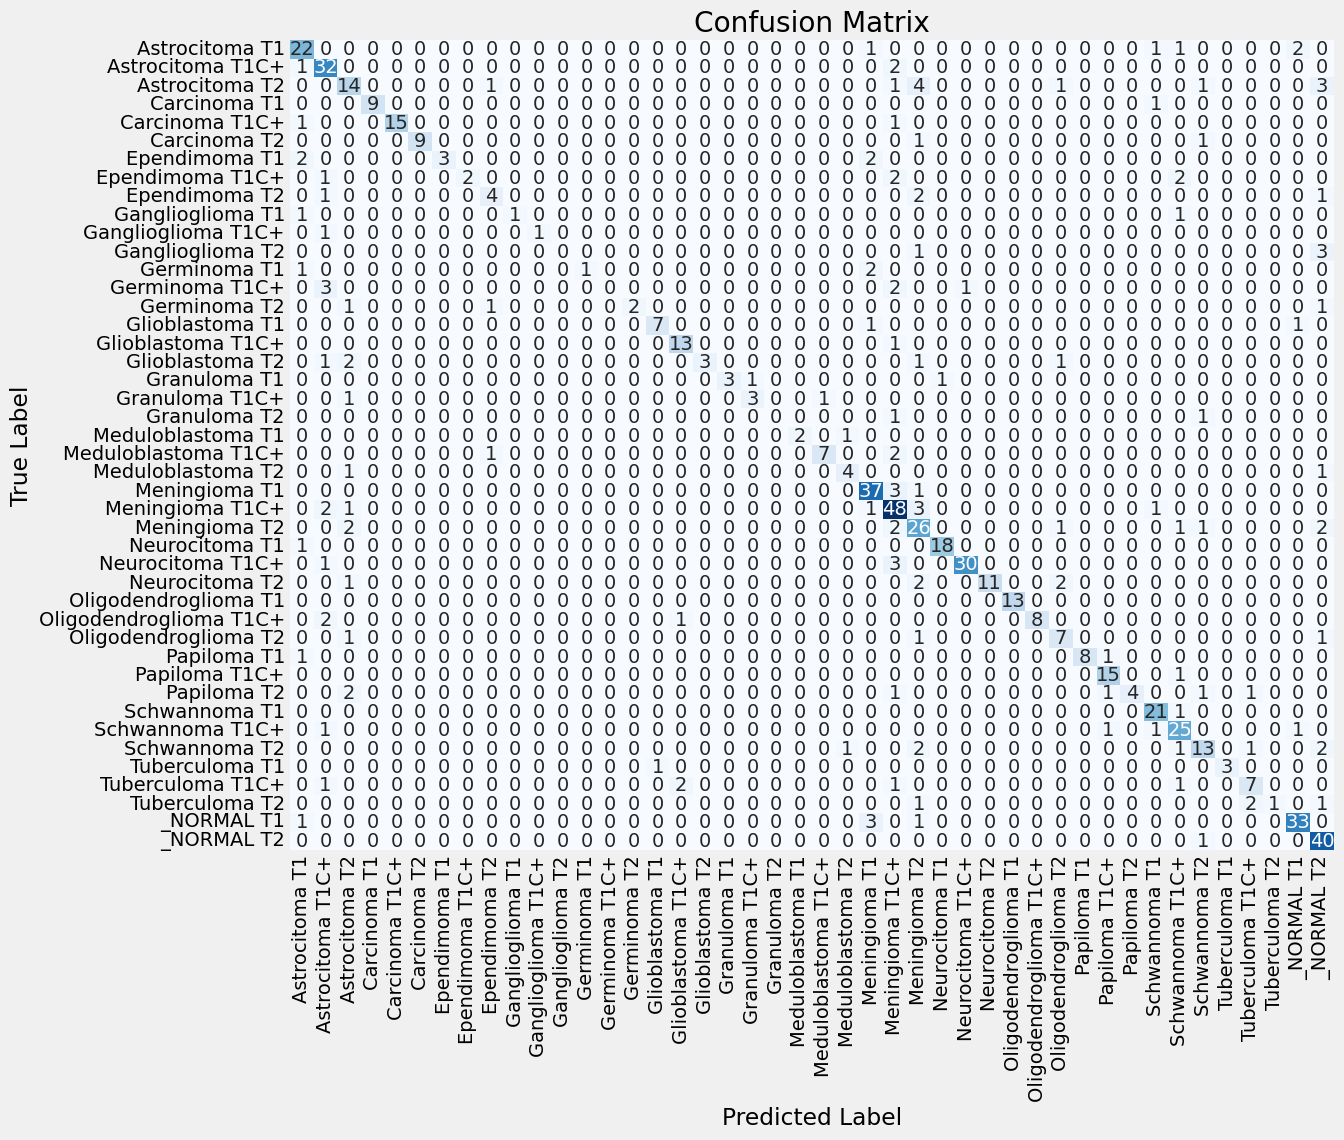

In [ ]:
class_names = list(test_gen.class_indices.keys())

confusion_mtx = confusion_matrix(y_true_labels, y_pred_labels)

plt.figure(figsize=(12, 10))  # Increase the size of the plot

# Use the heatmap function to display the confusion matrix with better formatting
sns.heatmap(confusion_mtx, cmap="Blues", annot=True, fmt="d", xticklabels=class_names, yticklabels=class_names, cbar=False)

plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# Rotate the tick labels for better readability
plt.xticks(rotation=90)
plt.yticks(rotation=0)

plt.show()


In [ ]:
report = classification_report(y_true_labels, y_pred_labels, target_names=class_names, zero_division=1)  # Set zero_division to 1 to treat it as 1

print("Classification Report: ")
print(report)

Classification Report: 
                        precision    recall  f1-score   support

        Astrocitoma T1       0.71      0.81      0.76        27
      Astrocitoma T1C+       0.70      0.91      0.79        35
        Astrocitoma T2       0.54      0.56      0.55        25
          Carcinoma T1       1.00      0.90      0.95        10
        Carcinoma T1C+       1.00      0.88      0.94        17
          Carcinoma T2       1.00      0.82      0.90        11
         Ependimoma T1       1.00      0.43      0.60         7
       Ependimoma T1C+       1.00      0.29      0.44         7
         Ependimoma T2       0.57      0.50      0.53         8
      Ganglioglioma T1       1.00      0.33      0.50         3
    Ganglioglioma T1C+       1.00      0.50      0.67         2
      Ganglioglioma T2       1.00      0.00      0.00         4
          Germinoma T1       1.00      0.25      0.40         4
        Germinoma T1C+       1.00      0.00      0.00         6
          Germi